In [3]:
import pandas as pd
import numpy as np
import string
import os
import sys
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Meal Item Price Problem

In [4]:
#The true prices used by the cashier
p_fish = 150;p_chips = 50;p_ketchup = 100

In [5]:
#sample meal prices: generate data meal prices for 5 days.
np.random.seed(100)
portions = np.random.randint(low=1, high=10, size=3 )
portions
X = [];y = [];days=10
for i in range(days):
    portions = np.random.randint(low=1, high=10, size=3 )
    price = p_fish * portions[0] + p_chips * portions[1] + p_ketchup * portions[2]    
    X.append(portions)
    y.append(price)
    
X = np.array(X)
y = np.array(y)

In [6]:
print (X,y)

[[8 8 1]
 [5 3 6]
 [3 3 3]
 [2 1 9]
 [5 1 7]
 [3 5 2]
 [6 4 5]
 [5 4 8]
 [2 2 8]
 [8 1 3]] [1700 1500  900 1250 1500  900 1600 1750 1200 1550]


In [17]:
#Create a linear model
from keras.layers import Input, Dense , Activation
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import Callback

In [18]:
price_guess = [np.array([[ 50 ],
        [   50],
        [  50 ]]) ]

In [19]:
model_input = Input(shape=(3,), dtype='float32')
model_output = Dense(1, activation='linear', use_bias=False, 
                     name='LinearNeuron',
                     weights=price_guess)(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
LinearNeuron (Dense)         (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y, batch_size=20, epochs=30,verbose=2)
l4  = history.history['loss']

Epoch 1/30
 - 0s - loss: 566500.0000
Epoch 2/30
 - 0s - loss: 38576.1797
Epoch 3/30
 - 0s - loss: 9320.0059
Epoch 4/30
 - 0s - loss: 6873.8545
Epoch 5/30
 - 0s - loss: 5998.2480
Epoch 6/30
 - 0s - loss: 5313.0757
Epoch 7/30
 - 0s - loss: 4722.4736
Epoch 8/30
 - 0s - loss: 4205.7593
Epoch 9/30
 - 0s - loss: 3750.5259
Epoch 10/30
 - 0s - loss: 3347.5698
Epoch 11/30
 - 0s - loss: 2989.7495
Epoch 12/30
 - 0s - loss: 2671.2886
Epoch 13/30
 - 0s - loss: 2387.4255
Epoch 14/30
 - 0s - loss: 2134.1394
Epoch 15/30
 - 0s - loss: 1907.9807
Epoch 16/30
 - 0s - loss: 1705.9363
Epoch 17/30
 - 0s - loss: 1525.3795
Epoch 18/30
 - 0s - loss: 1363.9904
Epoch 19/30
 - 0s - loss: 1219.7112
Epoch 20/30
 - 0s - loss: 1090.7164
Epoch 21/30
 - 0s - loss: 975.3729
Epoch 22/30
 - 0s - loss: 872.2355
Epoch 23/30
 - 0s - loss: 780.0092
Epoch 24/30
 - 0s - loss: 697.5385
Epoch 25/30
 - 0s - loss: 623.7888
Epoch 26/30
 - 0s - loss: 557.8368
Epoch 27/30
 - 0s - loss: 498.8590
Epoch 28/30
 - 0s - loss: 446.1151
Epoch 

In [21]:
model.get_layer('LinearNeuron').get_weights()

[array([[50.],
        [50.],
        [50.]], dtype=float32)]

### XOR Problem in Keras

In [22]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [23]:
#XOR is not a linearly seperable problem
#Lets try Linear Model  & see its not working. Add a non-linear layer


model_input = Input(shape=(2,), dtype='float32')
z = Dense(2,name='HiddenLayer', kernel_initializer='ones', activation='relu')(model_input)
#z = Activation('relu')(z)
z = Dense(1, name='OutputLayer')(z)
model_output = Activation('sigmoid')(z)
model = Model(model_input, model_output)
#model.summary()

In [24]:
sgd = SGD(lr=0.5)
#model.compile(loss="mse", optimizer=sgd)
model.compile(loss="binary_crossentropy", optimizer=sgd)

In [25]:
model.fit(X, y, batch_size=4, epochs=200,verbose=0)
preds = np.round(model.predict(X),decimals=3)
pd.DataFrame({'Y_actual':list(y), 'Predictions':list(preds)})

,Predictions,Y_actual
0,[0.107],[0]
1,[0.97],[1]
2,[0.97],[1]
3,[0.021],[0]


In [26]:
model.get_weights()

[array([[2.1339474, 2.8275306],
        [2.1339474, 2.8275306]], dtype=float32),
 array([-0.02101079, -2.852592  ], dtype=float32),
 array([[ 2.6571717],
        [-4.6348715]], dtype=float32),
 array([-2.1213162], dtype=float32)]

In [27]:
hidden_layer_output = Model(inputs=model.input,
                                 outputs=model.get_layer('HiddenLayer').output)

In [28]:
projection = hidden_layer_output.predict(X)

In [29]:
for i in range(4):
    print (X[i], projection[i])

[0 0] [0. 0.]
[0 1] [2.1129365 0.       ]
[1 0] [2.1129365 0.       ]
[1 1] [4.246884  2.8024693]


In [377]:
import matplotlib.pyplot as plt

In [378]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(211)
plt.scatter(x=projection[:, 0], y=projection[:, 1], c=('g'))

ax.set_xlabel('X axis (h1)')
ax.set_ylabel('Y axis (h2)')
ax.set_label('Transformed Space')

#hidden layer transforming the input to a linearly seperable.
x1, y1 = [projection[0, 0]-0.5, projection[3, 0]], [projection[0, 1]+0.5, projection[3, 1]+0.5]
plt.plot(x1, y1)
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (projection[i, 0]+0.1,projection[i, 1]))
ax = fig.add_subplot(212)
ax.set_label('Original Space')
plt.scatter(x=X[:, 0], y=X[:, 1], c=('b'))
for i, inputx in enumerate(X):
    ax.annotate(str(inputx), (X[i, 0]+0.05,X[i, 1]))


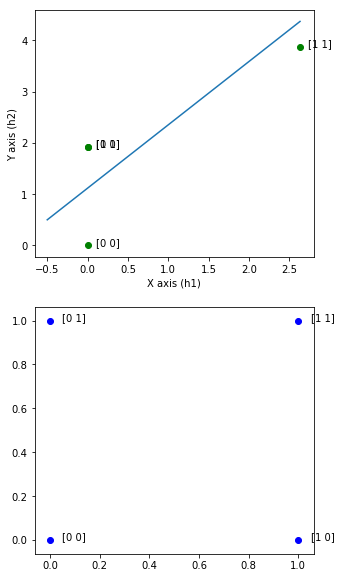

In [379]:
plt.show()

In [164]:
projection

array([[ -2.78249192e+00,   1.45849399e-03],
       [ -2.78954506e-02,   1.96480966e+00],
       [ -2.78954506e-02,   1.96480966e+00],
       [  2.72670102e+00,   3.92816067e+00]], dtype=float32)

In [415]:
#Logistic neuron: Logistic regression

In [416]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [421]:
X = data.data
y = data.target

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [425]:
X_train.shape

(398, 30)

In [459]:
model_input = Input(shape=(30,), dtype='float32')

model_output = Dense(1, activation='sigmoid',
                     name='SigmoidNeuron')(model_input)
sgd = SGD(lr=0.01)
model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [460]:
scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train), y_train, batch_size=10, epochs=5,verbose=2,
          validation_data=(scaler.fit_transform(X_test), y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/5
0s - loss: 0.6121 - acc: 0.6759 - val_loss: 0.4414 - val_acc: 0.8655
Epoch 2/5
0s - loss: 0.3767 - acc: 0.8518 - val_loss: 0.3202 - val_acc: 0.9181
Epoch 3/5
0s - loss: 0.2976 - acc: 0.8995 - val_loss: 0.2631 - val_acc: 0.9415
Epoch 4/5
0s - loss: 0.2562 - acc: 0.9171 - val_loss: 0.2282 - val_acc: 0.9532
Epoch 5/5
0s - loss: 0.2296 - acc: 0.9246 - val_loss: 0.2036 - val_acc: 0.9532


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 


In [41]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
print("m={}, c={}".format(slope,intercept))
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

m=82.90456141637904, c=-3.709228868670303


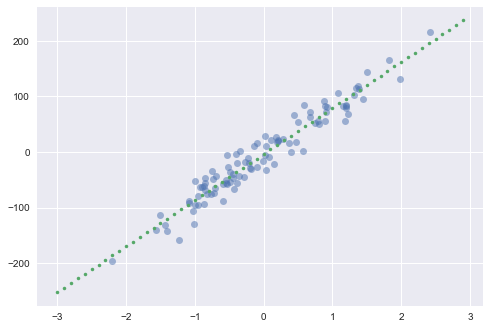

In [42]:
plt.show()

In [34]:
def gradient_descent(x, y, theta_init, step=0.1, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


In [35]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
#ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

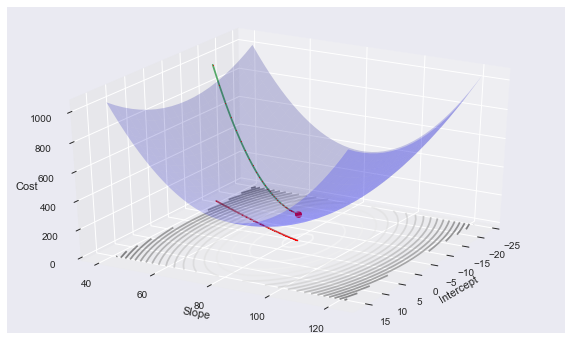

In [36]:
plt.show()

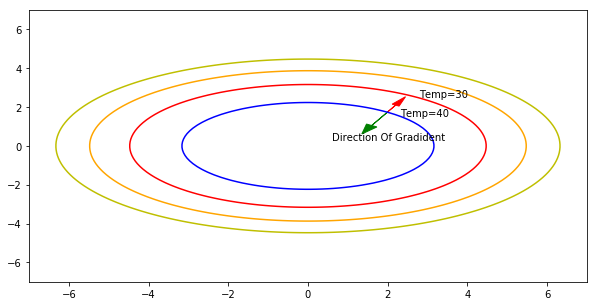

In [26]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
xlist = np.linspace(-7.0, 7.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-7.0, 7.0, 100)
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
Z = 50 - X**2 - 2*Y**2  # Compute function values on the grid
plt.contour(X, Y, Z, [10,20,30,40], colors = ['y','orange','r','b'], linestyles = 'solid')
ax.annotate('Direction Of Gradident', xy=(.6, 0.3), xytext=(.6, 0.3))
ax.annotate('Temp=30', xy=(2.8, 2.5), xytext=(2.8, 2.5))
ax.annotate('Temp=40', xy=(2.3, 2), xytext=(2.3, 1.5))
#ax.arrow(0, 0, 6.9, 6.8, head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(2, 1.75, 2*2/20, 4*1.75/20, head_width=0.2, head_length=0.5, fc='r', ec='r')
ax.arrow(2, 1.75, -2*2/10, -4*1.75/10, head_width=0.3, head_length=0.5, fc='g', ec='g')

plt.show()

In [287]:
50 - 2**2 - 2*1.75**2

39.875

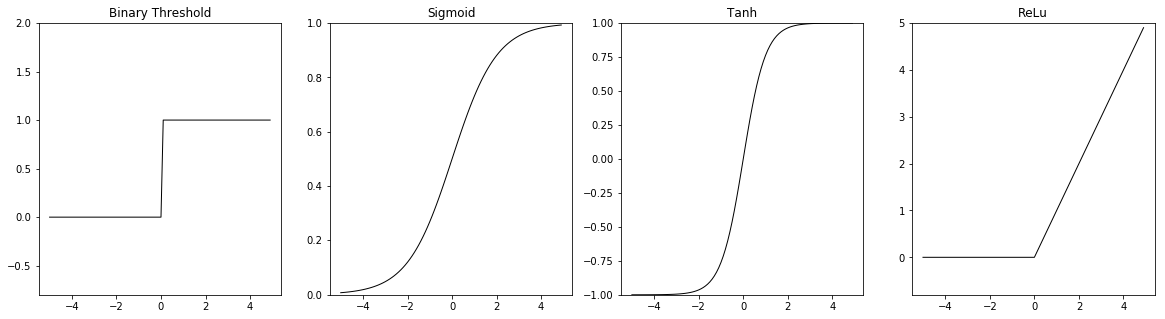

In [381]:
import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
ax = axes[0]
ax.plot(x, y_step,label='Binary Threshold',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,2)
ax.set_title('Binary Threshold')

ax = axes[1]
ax.plot(x, y_sigmoid,label='Sigmoid',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.001,1)
ax.set_title('Sigmoid')

ax = axes[2]
ax.plot(x, y_tanh,label='Tanh',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Tanh')

ax = axes[3]
ax.plot(x, y_relu,label='ReLu',  color='k', lw=1, linestyle=None)
ax.set_ylim(-0.8,5)
ax.set_title('ReLu')


plt.show()

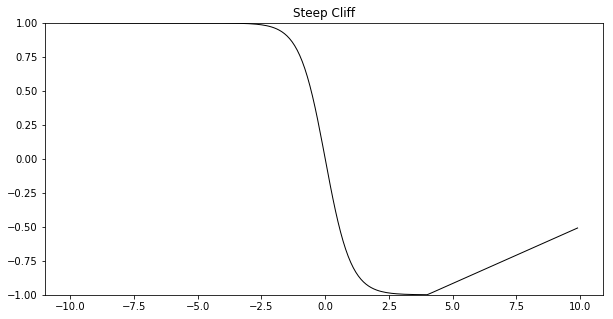

In [412]:
x = np.arange(-10.0, 10.0, 0.1)
def lineup(x):
    return (x-4)/12-1

def cliff(x):
    x1 = -tanh(x[x<4])
    x2 = np.apply_along_axis(lineup, 0, x[x>4])
    return np.concatenate([x1, x2])
y_cliff = cliff(x)

    
fig, axes = plt.subplots(ncols=1, figsize=(10, 5))
ax = axes
ax.plot(x, y_cliff,label='Steep Cliff',  color='k', lw=1, linestyle=None)
ax.set_ylim(-1.,1)
ax.set_title('Steep Cliff')
plt.show()

## Polynomial curve fitting: Model Capacity

In [30]:
from math import sin, pi
N = 100; max_degree = 20
noise = np.random.normal(0, 0.2, N)

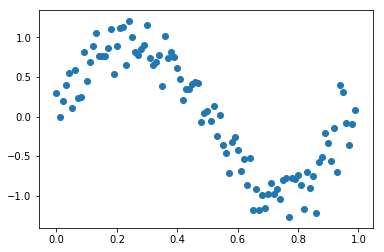

In [31]:
df = pd.DataFrame( index=list(range(N)),columns=list(range(1,max_degree)))
for i in range(N):
    df.loc[i]=[pow(i/N,n) for n in range(1,max_degree)]
df['y']=[sin(2*pi*x/N)+noise[x] for x in range(N)]

plt.scatter(x=df[1], y=df['y'])
plt.show()

In [100]:
from keras.initializers import RandomNormal
degree = 3
X = df[list(range(1,degree+1))].values
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.60, random_state=42)
model_input = Input(shape=(degree,), dtype='float32')
model_output = Dense(1, activation='linear', name='LinearNeuron')(model_input)
sgd = SGD(lr=0.4)
model = Model(model_input, model_output)
model.compile(loss="mean_squared_error", optimizer=sgd)

In [101]:
history = model.fit(X_train,y_train , batch_size=10, epochs=4000,verbose=0, validation_data=(X_test,y_test) )

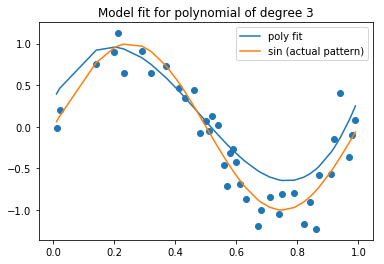

In [104]:
y_pred = model.predict(X_train)
plt.scatter(X_train[:,0], y_train)
plt.plot(np.sort(X_train[:,0]), y_pred[X_train[:,0].argsort()], label='poly fit')
plt.plot(np.sort(X_train[:,0]), [sin(2*pi*x) for x in np.sort(X_train[:,0]).tolist()], label='sin (actual pattern)')
plt.title("Model fit for polynomial of degree {}".format(degree))
plt.legend(loc='upper right')
plt.show()

In [103]:
model.get_weights()

[array([[  7.2821503],
        [-23.939705 ],
        [ 16.676823 ]], dtype=float32), array([0.3239697], dtype=float32)]

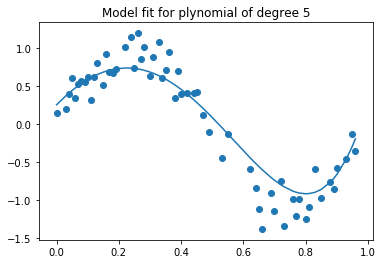

In [939]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:,0], y_test)
plt.plot(np.sort(X_test[:,0]), y_pred[X_test[:,0].argsort()])
plt.title("Model fit for plynomial of degree {}".format(degree))
plt.show()